In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df1=pd.read_csv(r'C:\Users\febat\OneDrive\Desktop\product_startegy_project\C8_Input_Files\dim_customers.csv')

In [46]:
df1.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [47]:
df2=pd.read_csv(r'C:\Users\febat\OneDrive\Desktop\product_startegy_project\C8_Input_Files\fact_spends.csv')

In [48]:
df2.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [50]:
df1['customer_id'].nunique()

4000

In [51]:
df1.describe()

,avg_income
count,4000.000000
mean,51657.032250
std,14690.140645
min,24816.000000
25%,38701.000000
50%,50422.000000
75%,64773.250000
max,86600.000000


In [52]:
df1.duplicated().sum()

0

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [54]:
df2.duplicated().sum()

0

In [55]:
df2.describe()

,spend
count,864000.000000
mean,614.464994
std,661.571676
min,6.000000
25%,191.000000
50%,395.000000
75%,793.000000
max,10313.000000


In [56]:
df3 = df2.groupby(['customer_id', 'month'])['spend'].sum().reset_index()
df3.head()

,customer_id,month,spend
0,ATQCUS0001,August,33776
1,ATQCUS0001,July,29451
2,ATQCUS0001,June,26316
3,ATQCUS0001,May,19480
4,ATQCUS0001,October,25262


In [57]:
df4 = df3.groupby('customer_id')['spend'].mean().reset_index()
df4.head()

,customer_id,spend
0,ATQCUS0001,28424.166667
1,ATQCUS0002,28085.666667
2,ATQCUS0003,26255.666667
3,ATQCUS0004,27109.166667
4,ATQCUS0005,26216.000000


In [58]:
#Key Metrics- Avg income utilisation %

In [59]:
final= df1.merge(df4,left_on='customer_id',right_on='customer_id',how='inner')

In [60]:
final['income_utilization_percentage'] = ((final['spend'] / final['avg_income']) * 100)
final.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,spend,income_utilization_percentage
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523,32400.666667,44.068749
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922,16518.666667,41.377353
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702,11517.000000,30.547451
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090,20384.833333,37.686880
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376,12251.000000,43.173809


In [61]:
avg_spends_all =final['spend'].mean()
avg_income_all =final['avg_income'].mean()

In [62]:
overall_income_utilization_percentage = ((avg_spends_all/avg_income_all)* 100).round(2)
print("Overall Average Income Utilization Percentage:")
print(overall_income_utilization_percentage)


Overall Average Income Utilization Percentage:
42.82


In [63]:
###Classifying Customers

In [64]:
#Age
final['age_group'].value_counts()

25-34    1498
35-45    1273
21-24     691
45+       538
Name: age_group, dtype: int64

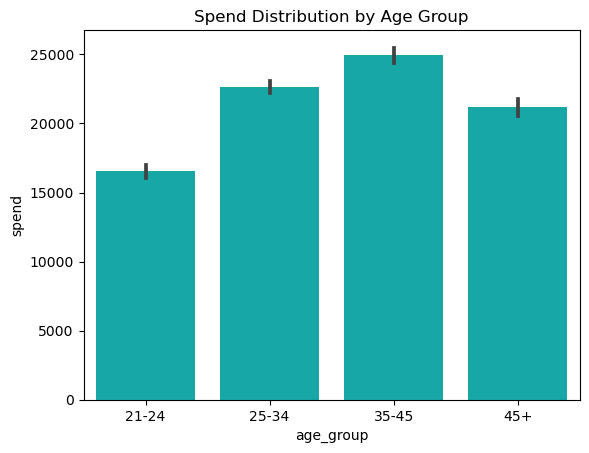

In [65]:
sns.barplot(data=final,x='age_group',y='spend',estimator='mean',color='c',order=['21-24','25-34','35-45','45+'])
plt.title('Spend Distribution by Age Group')
plt.show()

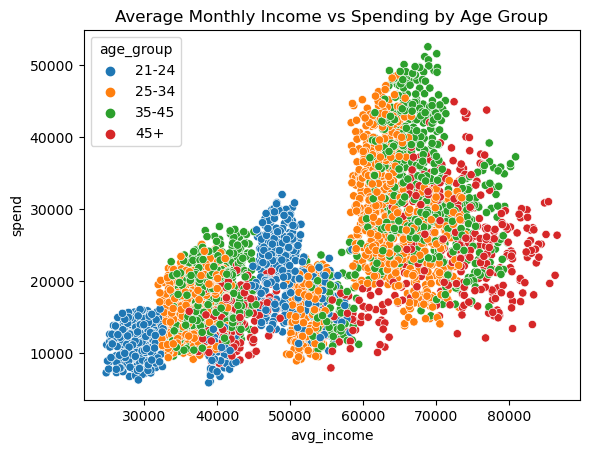

In [66]:
sns.scatterplot(data=final,x='avg_income',y='spend',hue='age_group',hue_order=['21-24','25-34','35-45','45+'])
plt.title('Average Monthly Income vs Spending by Age Group')
plt.show()

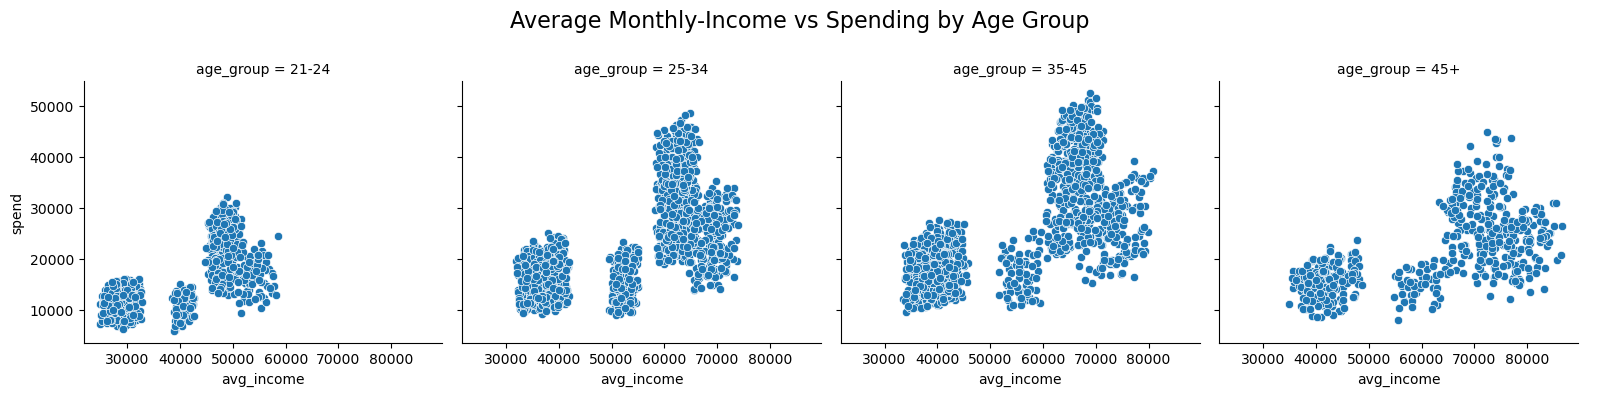

In [67]:
# Facet Grid

g = sns.FacetGrid(final, col='age_group', col_wrap=4, height=4,col_order=['21-24','25-34','35-45','45+'])
g.map(sns.scatterplot, 'avg_income', 'spend')
g.add_legend()
g.fig.suptitle('Average Monthly-Income vs Spending by Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.8)
plt.show()


In [68]:
income_util_age=final.groupby('age_group')['income_utilization_percentage'].mean().round(2)
income_util_age

age_group
21-24    40.51
25-34    43.79
35-45    46.61
45+      35.08
Name: income_utilization_percentage, dtype: float64

In [69]:
#City
final['city'].value_counts()

Mumbai       1078
Chennai       834
Bengaluru     751
Delhi NCR     744
Hyderabad     593
Name: city, dtype: int64

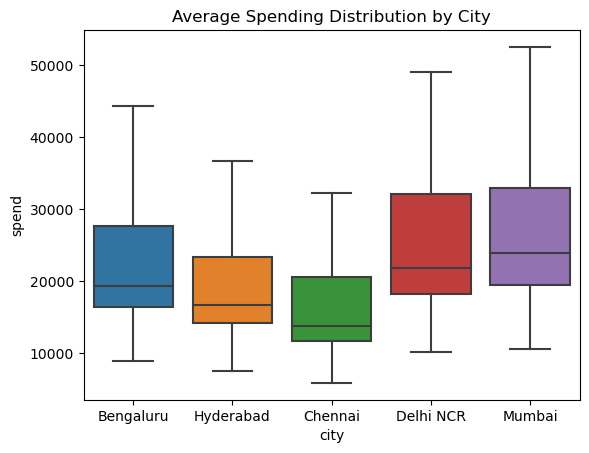

In [70]:
# Box Plot
sns.boxplot(data=final, x='city', y='spend')
plt.title('Average Spending Distribution by City')
plt.show()


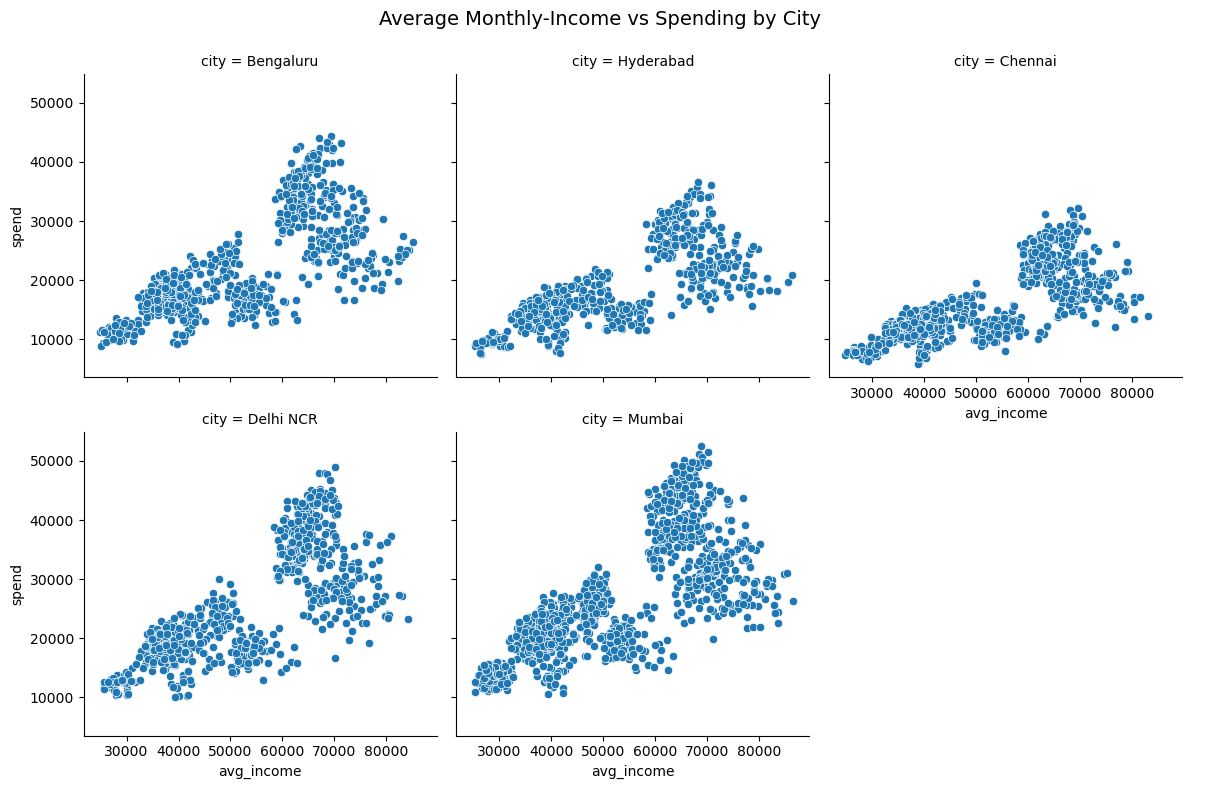

In [71]:
# Facet Grid

g = sns.FacetGrid(final, col='city', col_wrap=3, height=4)
g.map(sns.scatterplot, 'avg_income', 'spend')
g.fig.suptitle('Average Monthly-Income vs Spending by City', fontsize=14)
g.fig.subplots_adjust(top=0.9)
g.add_legend()

plt.show()


In [72]:
income_util_city=final.groupby('city')['income_utilization_percentage'].mean().round(2)
income_util_city

city
Bengaluru    43.74
Chennai      31.10
Delhi NCR    48.09
Hyderabad    36.47
Mumbai       51.58
Name: income_utilization_percentage, dtype: float64

In [73]:
#Occupation
final['occupation'].value_counts()

Salaried IT Employees       1294
Salaried Other Employees     893
Freelancers                  784
Business Owners              630
Government Employees         399
Name: occupation, dtype: int64

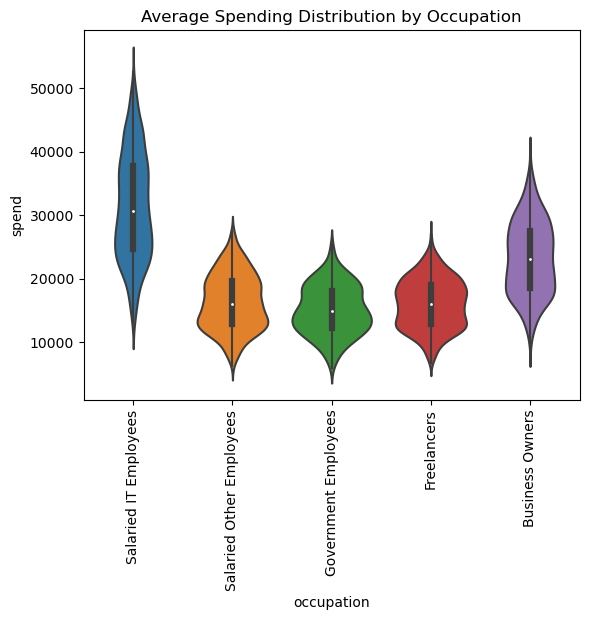

In [74]:
# Violin Plot
sns.violinplot(data=final, x='occupation', y='spend')
plt.xticks(rotation=90)
plt.title('Average Spending Distribution by Occupation')
plt.show()


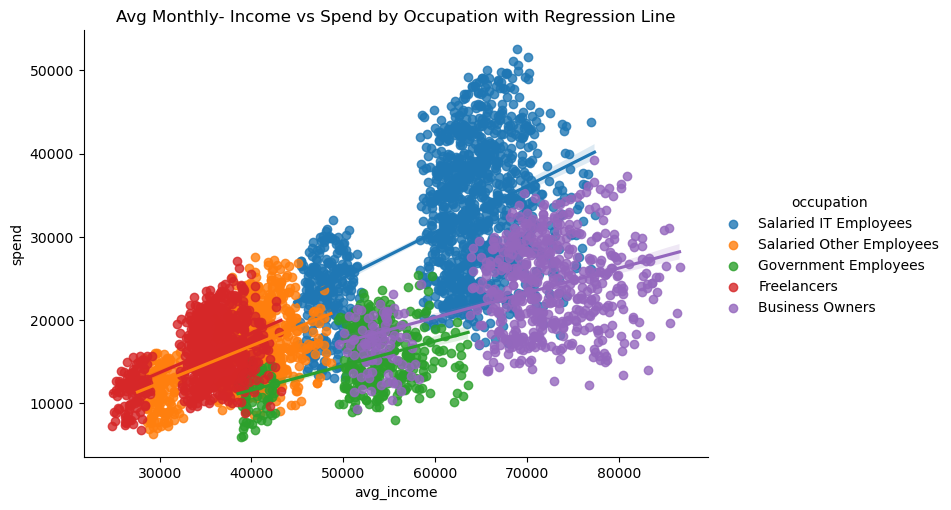

In [75]:
# Combined Scatter Plot with Regression Line
sns.lmplot(data=final, x='avg_income', y='spend', hue='occupation', aspect=1.5)
plt.title('Avg Monthly- Income vs Spend by Occupation with Regression Line')
plt.show()


In [98]:
income_util_occup=final.groupby('occupation')['income_utilization_percentage'].mean().round(2)
income_util_occup

occupation
Business Owners             33.24
Freelancers                 45.75
Government Employees        28.96
Salaried IT Employees       50.93
Salaried Other Employees    42.03
Name: income_utilization_percentage, dtype: float64

In [76]:
#Gender
final['gender'].value_counts()

Male      2597
Female    1403
Name: gender, dtype: int64

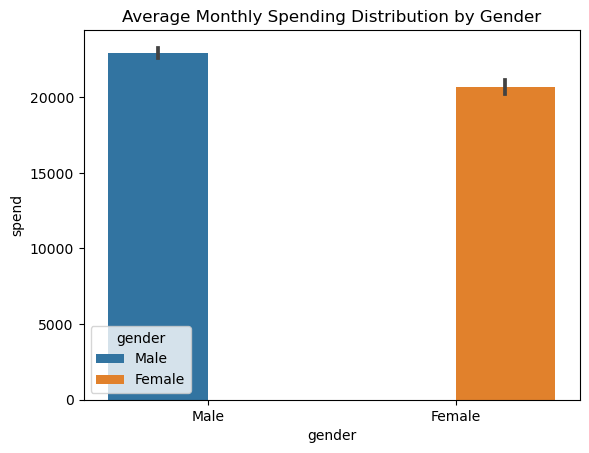

In [77]:
sns.barplot(data=final,x='gender',y='spend',estimator='mean',hue='gender')
plt.title('Average Monthly Spending Distribution by Gender')
plt.show()

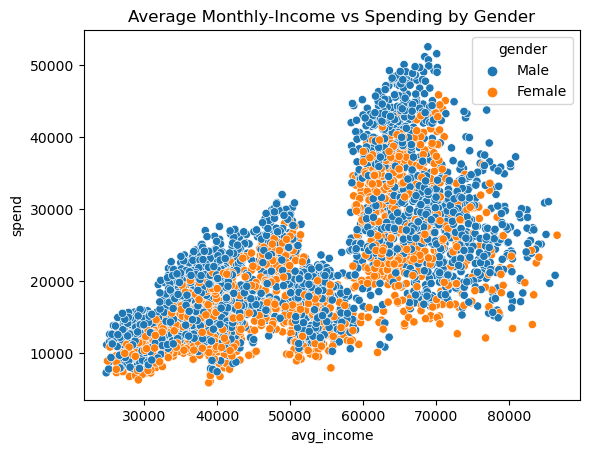

In [78]:
sns.scatterplot(data=final,x='avg_income',y='spend',hue='gender')
plt.title('Average Monthly-Income vs Spending by Gender')
plt.show()

In [99]:
income_util_gender=final.groupby('gender')['income_utilization_percentage'].mean().round(2)
income_util_gender

gender
Female    39.65
Male      44.73
Name: income_utilization_percentage, dtype: float64

In [79]:
#Marital Status
final['marital status'].value_counts()

Married    3136
Single      864
Name: marital status, dtype: int64

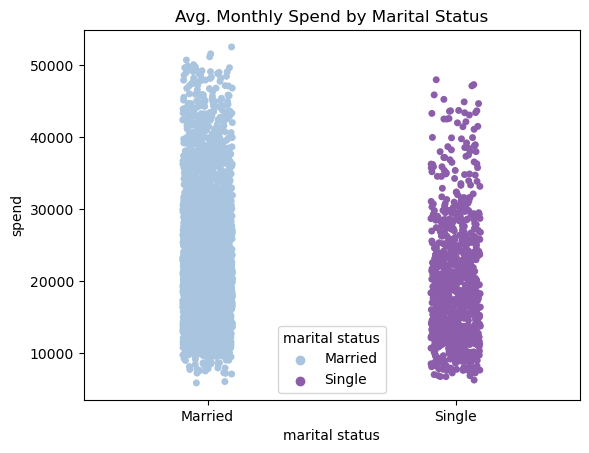

In [80]:
# Strip Plot
sns.stripplot(data=final, x='marital status', y='spend',hue='marital status',palette='BuPu',)
plt.title('Avg. Monthly Spend by Marital Status')
plt.show()


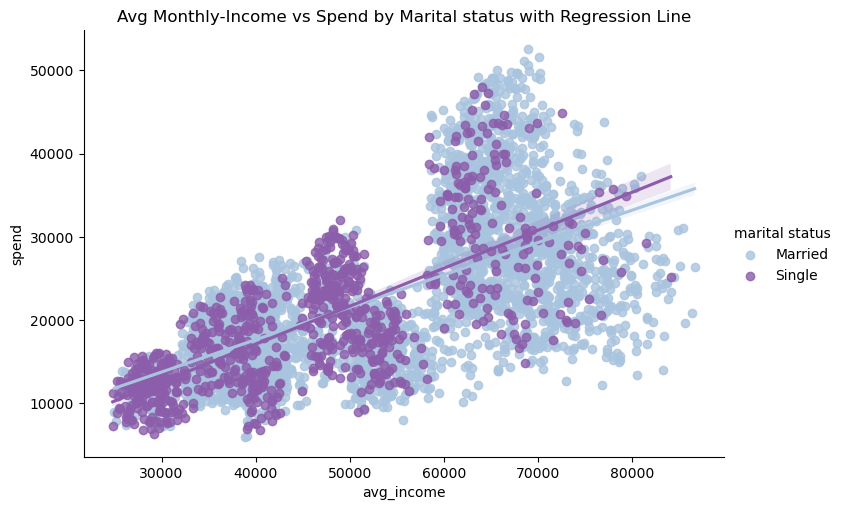

In [81]:
# Combined Scatter Plot with Regression Line
sns.lmplot(data=final, x='avg_income', y='spend', hue='marital status', aspect=1.5,palette='BuPu')
plt.title('Avg Monthly-Income vs Spend by Marital status with Regression Line')
plt.show()


In [140]:
final_married=final[final['marital status']=='Married']
income_util_married_percent =((final_married['spend'].mean())/(final_married['avg_income'].mean()))*100

In [145]:
final_single=final[final['marital status']=='Single']
income_util_single_percent =(final_single['spend'].mean())/(final_single['avg_income'].mean())*100

In [146]:
print("Income Utilization for married Percentage:")
print(income_util_married_percent.round(2))

Income Utilization for married Percentage:
42.77


In [148]:
print("Income Utilization for Single Percentage:")
print(income_util_single_percent.round(2))

Income Utilization for Single Percentage:
43.06


In [ ]:
#Spending Demographics- Payment Type

In [83]:
final_spend = df2.merge(df1,left_on='customer_id',right_on='customer_id', how='left')
final_spend.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696
1,ATQCUS0368,October,Groceries,Credit Card,1466,25-34,Delhi NCR,Salaried Other Employees,Male,Married,39893
2,ATQCUS0595,May,Health & Wellness,Credit Card,387,25-34,Bengaluru,Government Employees,Male,Married,52001
3,ATQCUS0667,October,Electronics,Credit Card,1137,25-34,Chennai,Salaried Other Employees,Male,Married,40243
4,ATQCUS3477,September,Bills,UPI,2102,25-34,Mumbai,Business Owners,Male,Single,73541


In [84]:
final_spend['payment_type'].value_counts()

Credit Card    216000
UPI            216000
Debit Card     216000
Net Banking    216000
Name: payment_type, dtype: int64

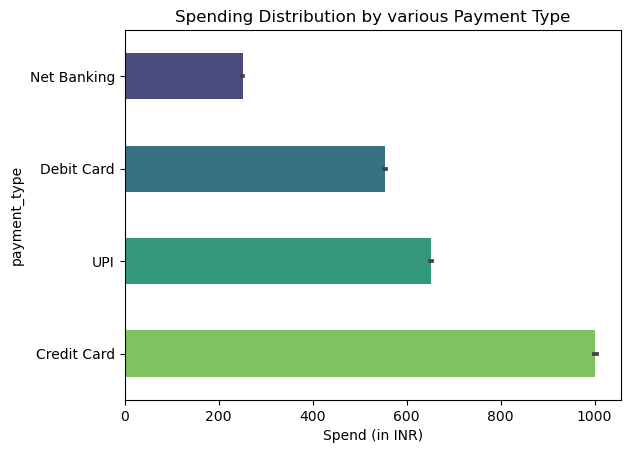

In [85]:
sns.barplot(data=final_spend.sort_values('spend',ascending=True),y='payment_type',x='spend',orient='h',palette='viridis',width=0.5)
plt.title('Spending Distribution by various Payment Type')
plt.xlabel('Spend (in INR)')
plt.show()

In [86]:
pay_pref= pd.pivot_table(final_spend,values='spend',index='payment_type',columns='age_group')
pay_pref

age_group,21-24,25-34,35-45,45+
payment_type,,,,
Credit Card,620.496570,1171.899075,1075.443688,840.914705
Debit Card,396.335986,442.692788,753.925431,589.690933
Net Banking,168.028863,209.227427,261.039510,449.862247
UPI,651.529131,690.115141,682.857031,473.162364


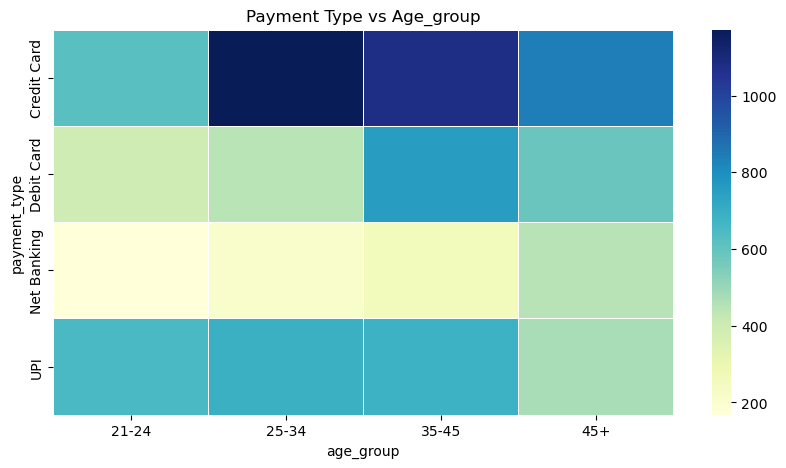

In [87]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(pay_pref,cmap='YlGnBu',linewidths=0.5)
plt.title('Payment Type vs Age_group')
plt.show()


In [88]:
#Spending Demographics- Category

In [89]:
final_spend['category'].value_counts()

Health & Wellness    96000
Groceries            96000
Electronics          96000
Bills                96000
Entertainment        96000
Apparel              96000
Food                 96000
Others               96000
Travel               96000
Name: category, dtype: int64

In [90]:
#Category the most spend on-

category_spend = final_spend.groupby('category')['spend'].sum().round(2).reset_index()
category_spend.sort_values('spend',ascending=False)


,category,spend
1,Bills,104912768
5,Groceries,86303761
2,Electronics,79562220
6,Health & Wellness,65599867
8,Travel,59223324
4,Food,44013470
3,Entertainment,41289162
0,Apparel,34036001
7,Others,15957182


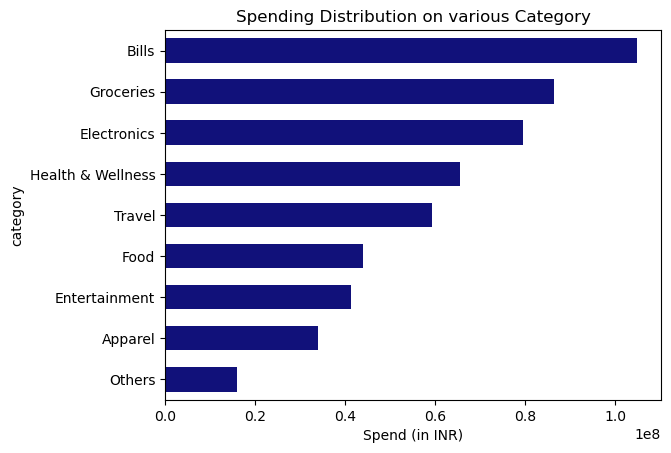

In [91]:
sns.barplot(data=category_spend.sort_values('spend',ascending=False),y='category',x='spend',orient='h',color='Darkblue',width=0.6)
plt.title('Spending Distribution on various Category')
plt.xlabel('Spend (in INR)')
plt.show()

In [92]:
category_spend2= pd.pivot_table(final_spend,values='spend',index='category',columns='gender')
category_spend2

gender,Female,Male
category,,
Apparel,563.022689,241.912158
Bills,723.006920,1292.640210
Electronics,555.488388,976.412126
Entertainment,291.457977,504.992764
Food,500.522749,435.757092
Groceries,597.417736,1061.922587
Health & Wellness,1075.148373,471.657538
Others,181.729983,157.841901
Travel,672.567445,586.841115


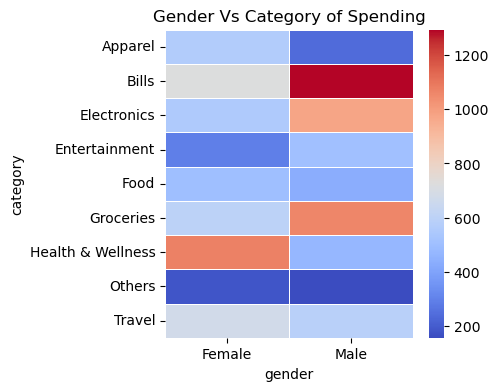

In [93]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(category_spend2,cmap='coolwarm',linewidths=0.5)
plt.title('Gender Vs Category of Spending')
plt.show()


In [94]:
category_spend3= pd.pivot_table(final_spend,values='spend',index='category',columns='age_group')
category_spend3

age_group,21-24,25-34,35-45,45+
category,,,,
Apparel,671.664677,250.909880,336.582581,278.278423
Bills,211.872890,1222.625584,1377.253109,1190.008984
Electronics,685.839001,915.724522,911.546151,574.394362
Entertainment,911.856971,354.609006,321.718676,277.948730
Food,560.463037,423.435636,470.232685,397.215304
Groceries,337.971056,1043.509902,1036.221033,892.499690
Health & Wellness,380.488061,519.039219,985.358896,815.107652
Others,124.956766,170.349438,186.958857,158.653113
Travel,246.766281,756.149282,613.975746,711.561803


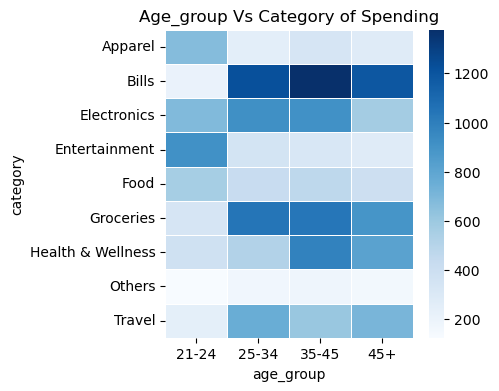

In [95]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(category_spend3,cmap='Blues',linewidths=0.5)
plt.title('Age_group Vs Category of Spending')
plt.show()


In [96]:
category_spend4= pd.pivot_table(final_spend,values='spend',index='category',columns='marital status')
category_spend4

marital status,Married,Single
category,,
Apparel,318.302429,486.076726
Bills,1200.279257,702.881462
Electronics,833.525616,811.523341
Entertainment,360.740128,681.829524
Food,445.161751,506.790895
Groceries,961.596753,671.785446
Health & Wellness,747.401958,450.781539
Others,171.828138,145.867525
Travel,661.493118,455.088059


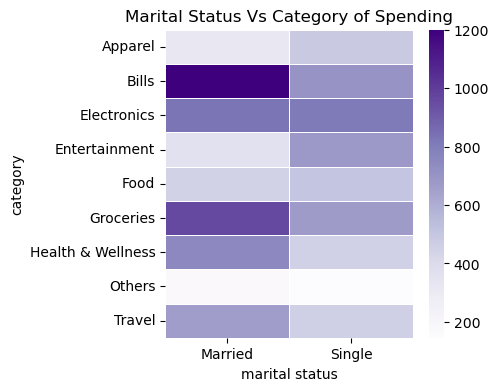

In [97]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(category_spend4,cmap='Purples',linewidths=0.7)
plt.title('Marital Status Vs Category of Spending')
plt.show()


In [150]:
category_spend5= pd.pivot_table(final_spend,values='spend',index='category',columns='payment_type')
category_spend5

payment_type,Credit Card,Debit Card,Net Banking,UPI
category,,,,
Apparel,582.082208,346.532958,146.758083,342.793458
Bills,1930.524417,1055.755458,450.537500,934.547958
Electronics,1465.990208,655.879583,312.223042,880.999667
Entertainment,712.704750,344.799125,167.926500,494.951375
Food,643.003500,379.794000,187.724667,623.372417
Groceries,1131.934125,891.827083,380.699917,1191.528917
Health & Wellness,1153.187708,686.762542,298.014583,595.362958
Others,284.607667,136.979917,69.388167,173.906833
Travel,1108.835125,483.220542,245.412125,630.170708


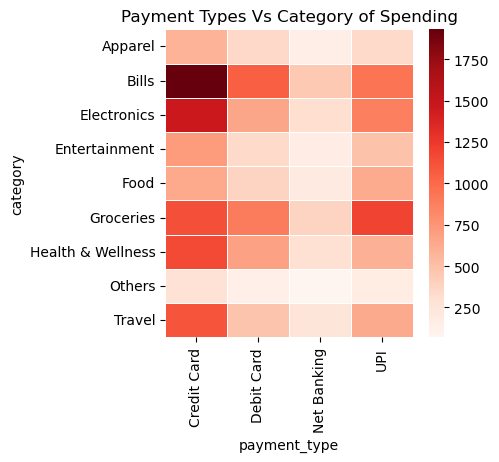

In [151]:
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(category_spend5,cmap='Reds',linewidths=0.7)
plt.title('Payment Types Vs Category of Spending')
plt.show()
